# Análisis del gasto del municipio de Navojoa, Sonora en 2018.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Obetenemos la carpeta de datos a partir de un enlace que nos descarga una carpeta comprimida
carpeta = !wget https://www.inegi.org.mx/contenidos/programas/finanzas/datosabiertos/efipem_municipal_csv.zip

In [ ]:
# Descomprimimos la carpeta
!unzip /content/efipem_municipal_csv.zip

Archive:  /content/efipem_municipal_csv.zip
  inflating: catalogos/tc_entidad.csv  
  inflating: catalogos/tc_municipio.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1989.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1990.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1991.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1992.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1993.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1994.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1995.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1996.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1997.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1998.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cifra_1999.csv  
  inflating: conjunto_de_datos/efipem_municipal_anual_tr_cif

In [ ]:
# Leemos el archivo correspondiente al año 2018
datos = pd.read_csv("/content/conjunto_de_datos/efipem_municipal_anual_tr_cifra_2018.csv")

In [ ]:
datos.head()

,PROD_EST,COBERTURA,ANIO,ID_ENTIDAD,ID_MUNICIPIO,TEMA,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR,ESTATUS
0,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,1,1,Egresos,Tema,Total de egresos,3649485258,Cifras Definitivas.
1,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,1,1,Egresos,Capítulo,Servicios personales,1455455379,Cifras Definitivas.
2,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,1,1,Egresos,Concepto,Remuneraciones al personal,442212911,Cifras Definitivas.
3,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,1,1,Egresos,Partida Genérica,Dependencias diversas,442212911,Cifras Definitivas.
4,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,1,1,Egresos,Concepto,Remuneraciones adicionales y especiales,427076278,Cifras Definitivas.


In [ ]:
# Leemos el diccionario de datos para saber a que se refieren las columnas del dataset
dicc_datos = pd.read_csv("/content/diccionario_de_datos/diccionario_datos_efipem_municipal_anual_1989_2021.csv")

In [ ]:
dicc_datos

,PRODUCTO_DD,COLUMNA,DESCRIPCION,TIPO_DATO,LONGITUD,COD_VALIDO
0,Estadística de Finanzas Públicas Estatales y M...,PROD_EST,Nombre del proyecto estadístico al que pertene...,varchar,max,NaN
1,Estadística de Finanzas Públicas Estatales y M...,COBERTURA,Área geográfica a la que están referidos los i...,varchar,max,NaN
2,Estadística de Finanzas Públicas Estatales y M...,ANIO,Año de referencia de la información.,int,NaN,1989-2021
3,Estadística de Finanzas Públicas Estatales y M...,ID_ENTIDAD,Clave de la entidad según Catálogo de Entidade...,varchar,2,00-32
4,Estadística de Finanzas Públicas Estatales y M...,ID_MUNICIPIO,Clave del municipios según Catálogo de Entidad...,varchar,3,000-999
5,Estadística de Finanzas Públicas Estatales y M...,TEMA,Categoría correspondiente al mayor nivel de ag...,varchar,max,NaN
6,Estadística de Finanzas Públicas Estatales y M...,CATEGORIA,Nivel de desglose conceptual según Catálogo de...,varchar,max,NaN
7,Estadística de Finanzas Públicas Estatales y M...,DESCRIPCION_CATEGORIA,Descripción del concepto financiero según Catá...,varchar,max,NaN
8,Estadística de Finanzas Públicas Estatales y M...,VALOR,Valor en pesos correspondiente a cada categoría,int,NaN,0-99999999
9,Estadística de Finanzas Públicas Estatales y M...,ESTATUS,Estatus de las cifras conforme a los Lineamien...,varchar,max,NaN


In [ ]:
# Leemos el catálogo de municipios para conocer el id de Entidad y Municipio que requerimos
# para acceder a la inforamción
catal_munic = pd.read_csv("/content/catalogos/tc_municipio.csv")

In [ ]:
catal_munic.head()

,ID_ENTIDAD,ID_MUNICIPIO,NOM_MUN
0,1,1,Aguascalientes
1,1,2,Asientos
2,1,3,Calvillo
3,1,4,Cosío
4,1,5,Jesús María


In [ ]:
# Consultamos el catálogo de municipios para saber el id de ciudad y entidad.
catal_munic[catal_munic["NOM_MUN"] == "Navojoa"]

,ID_ENTIDAD,ID_MUNICIPIO,NOM_MUN
1927,26,42,Navojoa


In [ ]:
# Obtenemos el subset de datos que corresponde al municipio de Navojoa
nav2018 = datos[(datos["ID_MUNICIPIO"] == 42) & (datos["ID_ENTIDAD"] == 26)]

In [ ]:
nav2018.head()

,PROD_EST,COBERTURA,ANIO,ID_ENTIDAD,ID_MUNICIPIO,TEMA,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR,ESTATUS
205994,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,26,42,Egresos,Tema,Total de egresos,623001575,Cifras Definitivas.
205995,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,26,42,Egresos,Capítulo,Servicios personales,218072744,Cifras Definitivas.
205996,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,26,42,Egresos,Concepto,Remuneraciones al personal,110587656,Cifras Definitivas.
205997,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,26,42,Egresos,Partida Genérica,Dependencias diversas,110587656,Cifras Definitivas.
205998,Estadística de Finanzas Públicas Estatales y M...,Municipal,2018,26,42,Egresos,Concepto,Remuneraciones adicionales y especiales,44824601,Cifras Definitivas.


In [ ]:
egr_nav =nav2018[nav2018["TEMA"] == "Egresos"]

In [ ]:
egresos_nav = egr_nav[["CATEGORIA", "DESCRIPCION_CATEGORIA", "VALOR"]]
egresos_nav.head()

,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR
205994,Tema,Total de egresos,623001575
205995,Capítulo,Servicios personales,218072744
205996,Concepto,Remuneraciones al personal,110587656
205997,Partida Genérica,Dependencias diversas,110587656
205998,Concepto,Remuneraciones adicionales y especiales,44824601


In [ ]:
egresos_nav.tail()

,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR
206089,Partida Genérica,Amortización de la deuda interna con instituci...,9618973
206090,Partida Genérica,Diversas amortizaciones de la deuda pública,4297081
206091,Concepto,Intereses de la deuda pública,14005841
206092,Partida Genérica,Intereses de la deuda interna con institucione...,14005841
206093,Capítulo,Disponibilidad final,39586283


In [ ]:
egr_totales_nav = egresos_nav[egresos_nav["DESCRIPCION_CATEGORIA"] == "Total de egresos"]
egr_totales_nav

,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR
205994,Tema,Total de egresos,623001575


In [ ]:
egresos_nav_capitulo = egresos_nav[egresos_nav["CATEGORIA"] == "Capítulo"]
egresos_nav_capitulo

,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR
205995,Capítulo,Servicios personales,218072744
206012,Capítulo,Materiales y suministros,40254261
206029,Capítulo,Servicios generales,122086491
206071,Capítulo,"Transferencias, asignaciones, subsidios y otra...",98359321
206082,Capítulo,"Bienes muebles, inmuebles e intangibles",62013198
206084,Capítulo,Inversión pública,14707382
206087,Capítulo,Deuda pública,27921895
206093,Capítulo,Disponibilidad final,39586283


In [ ]:
# Suma de todos los egresos por capítulo
np.sum(egresos_nav_capitulo.VALOR)

623001575

Podemos notar que la suma de todos los egreos por capítulo es igual al "Total de egresos" señalado en la primera linea de "egresos_nav". Los cuales son $623,001,575

In [ ]:
# Crear un bucle para elaborar columnas y sacar porcentajes de los capitulos de gasto
# Primero convertimos el valor de egresos totales en "int"
valor_egr_total = int(egr_totales_nav.VALOR)
valor_egr_total

623001575

In [ ]:
# Ahora ya podemos realizar el bucle usando este variable
porcentaje = []
for i in (egresos_nav_capitulo.VALOR):
  porcentaje.append(i / valor_egr_total)

In [ ]:
porcentaje

[0.3500356223015969,
 0.06461341771086213,
 0.1959649797033017,
 0.15787973088190027,
 0.0995393920151807,
 0.02360729505378859,
 0.04481833773855227,
 0.06354122459481744]

In [ ]:
# Ahora generamos el dataframe con la descripción del capítulo que viene en la columna "DESCRIPCION_CATEGORIA",
# la columna "VALOR" Y "Porcentaje"
df_porcentaje = pd.DataFrame(
    {
        "Capitulo": egresos_nav_capitulo.DESCRIPCION_CATEGORIA,
        "Valor": egresos_nav_capitulo.VALOR,
     "Porcentaje": porcentaje
    }
)

In [ ]:
df_porcentaje

,Capitulo,Valor,Porcentaje
205995,Servicios personales,218072744,0.350036
206012,Materiales y suministros,40254261,0.064613
206029,Servicios generales,122086491,0.195965
206071,"Transferencias, asignaciones, subsidios y otra...",98359321,0.157880
206082,"Bienes muebles, inmuebles e intangibles",62013198,0.099539
206084,Inversión pública,14707382,0.023607
206087,Deuda pública,27921895,0.044818
206093,Disponibilidad final,39586283,0.063541


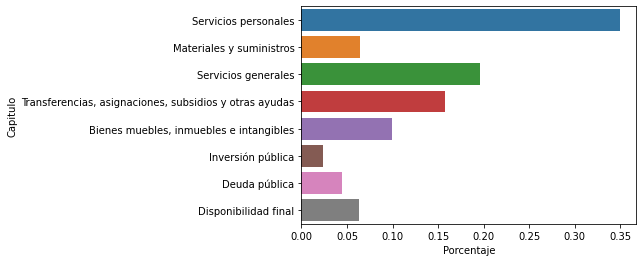

In [ ]:
# Realizaremos un par de gráficas para visualizar los resultados
sns.barplot(data= df_porcentaje, x= "Porcentaje", y= "Capitulo")

1. ¿Cuál es el capítulo que mayor gasto ha representado para el municipio de Navojoa en 2018?

R= Como se puede observar el capítulo de "Servicios personales" es el que ha representado un gasto mayor para el municipio en 2018, con un 35% de los egresos totales. Seguido del rubro de "servicios generales" con un 19.6% de los egresos.

2. ¿Cuál es capítulo en que se ha gastado menos?

R= El rubro en el que se ha gastado menos es en "Inversión Pública" asignándole un 2.3% del presupuesto anual.

In [ ]:
def df_municipio(municipio):
  datos = pd.read_csv("/content/conjunto_de_datos/efipem_municipal_anual_tr_cifra_2018.csv")
  catal_munic = pd.read_csv("/content/catalogos/tc_municipio.csv")
  id_munic = catal_munic[catal_munic["NOM_MUN"] == municipio]
  id_ent = int(id_munic.ID_ENTIDAD[0:1])
  id_municipio = int(id_munic.ID_MUNICIPIO[0:1])
  munic_18 = datos[(datos["ID_MUNICIPIO"] == id_municipio) & (datos["ID_ENTIDAD"] == id_ent)]
  egr_munic_18 = munic_18[munic_18["TEMA"] == "Egresos"]
  egresos_munic = egr_munic_18[["CATEGORIA", "DESCRIPCION_CATEGORIA", "VALOR"]]
  egr_totales_munic = egresos_munic[egresos_munic["DESCRIPCION_CATEGORIA"] == "Total de egresos"]
  valor_egr_totales = int(egr_totales_munic.VALOR)
  
  egresos_munic_capitulo = egresos_munic[(egresos_munic["CATEGORIA"] == "Capítulo") & (egresos_munic["DESCRIPCION_CATEGORIA"] != "Disponibilidad final")]
  
  porcentaje = []
  for i in (egresos_munic_capitulo.VALOR):
    porcentaje.append(i / valor_egr_totales)
  
  df_porcentaje = pd.DataFrame(
    {
        "Capitulo": egresos_munic_capitulo.DESCRIPCION_CATEGORIA,
        "Valor": egresos_munic_capitulo.VALOR,
     "Porcentaje": porcentaje
    }
                              )
  return df_porcentaje

In [ ]:
hermosillo = df_municipio("Hermosillo")

In [ ]:
cajeme = df_municipio("Cajeme")

In [ ]:
guaymas = df_municipio("Guaymas")

In [ ]:
nogales = df_municipio("Nogales")

In [ ]:
slrc = df_municipio("San Luis Río Colorado")

In [ ]:
navojoa = df_municipio("Navojoa")

In [ ]:
df_gasto_municipios = pd.DataFrame(
    {
      "Capitulo": list(navojoa["Capitulo"]),
      "Navojoa": list(navojoa["Porcentaje"]),
      "Hermosillo": list(hermosillo["Porcentaje"]),
      "Cajeme": list(cajeme["Porcentaje"]),
      "Guaymas": list(guaymas["Porcentaje"]),
      "Nogales": list(nogales["Porcentaje"]),
      "SLRC": list(slrc["Porcentaje"])
     
    }
)

In [ ]:
df_gasto_municipios

,Capitulo,Navojoa,Hermosillo,Cajeme,Guaymas,Nogales,SLRC
0,Servicios personales,0.350036,0.364185,0.388811,0.396403,0.356948,0.341268
1,Materiales y suministros,0.064613,0.041984,0.066195,0.042924,0.057951,0.107432
2,Servicios generales,0.195965,0.140273,0.163818,0.130932,0.086828,0.124483
3,"Transferencias, asignaciones, subsidios y otra...",0.157880,0.078926,0.128238,0.127487,0.152753,0.137815
4,"Bienes muebles, inmuebles e intangibles",0.099539,0.012171,0.004236,0.003318,0.002720,0.032059
5,Inversión pública,0.023607,0.101576,0.112809,0.117407,0.082477,0.235278
6,Deuda pública,0.044818,0.111678,0.120385,0.181528,0.096083,0.021665


In [ ]:
# Obtenemos la lista de columnas que deseamos como índices excepto la columna capítulo,
# extraeremos los valores para que ahora sean las columnas
columnas = df_gasto_municipios.columns.values[1:]
columnas

array(['Navojoa', 'Hermosillo', 'Cajeme', 'Guaymas', 'Nogales', 'SLRC'],
      dtype=object)

In [ ]:
gasto_munic_pivot = pd.pivot_table(df_gasto_municipios, columns= 'Capitulo', values= columnas).reset_index()
gasto_munic_pivot

Capitulo,index,"Bienes muebles, inmuebles e intangibles",Deuda pública,Inversión pública,Materiales y suministros,Servicios generales,Servicios personales,"Transferencias, asignaciones, subsidios y otras ayudas"
0,Cajeme,0.004236,0.120385,0.112809,0.066195,0.163818,0.388811,0.128238
1,Guaymas,0.003318,0.181528,0.117407,0.042924,0.130932,0.396403,0.127487
2,Hermosillo,0.012171,0.111678,0.101576,0.041984,0.140273,0.364185,0.078926
3,Navojoa,0.099539,0.044818,0.023607,0.064613,0.195965,0.350036,0.157880
4,Nogales,0.002720,0.096083,0.082477,0.057951,0.086828,0.356948,0.152753
5,SLRC,0.032059,0.021665,0.235278,0.107432,0.124483,0.341268,0.137815


Tenemos la tabla como se requiere para poder comparar los municipios por capítulo de gasto.

In [ ]:
# Esta función nos ayuda a obtener el promedio de cada columna lo cual requeriremos en la visualización
def gasto_prom(columna): 
    promedio = gasto_munic_pivot[columna].mean()
    return promedio

In [ ]:
bmii = gasto_prom("Bienes muebles, inmuebles e intangibles")
bmii

0.025673898765034772

## Bienes Muebles, Inmuebles e Intangibles

Realizamos la primera gráfica comparando la columna "Bienes muebles, inmuebles e intangibles" para todos los municipios.

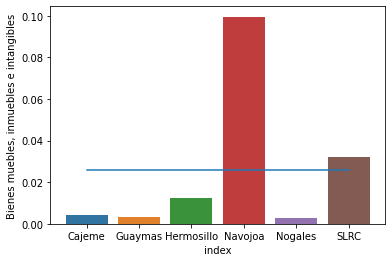

In [ ]:
sns.barplot(data= gasto_munic_pivot, x=  "index", y= "Bienes muebles, inmuebles e intangibles")
sns.lineplot(data= gasto_munic_pivot, x= "index", y= bmii)

In [ ]:
valor_egr_total

623001575

Lo primero que podemos notar en esta gráfica es que el municipio de Navojoa ha gastado el 10% de sus recursos en el capítulo de bienes muebles, inmuebles e intangibles", muy por encima del promedio y del gasto total de todos los municipios de la lista. Siendo que las erogaciones totales del municipio en 2018 fueron de $623,001,575 pesos, esto significa que se destinaron alrededor de 62 millones de pesos a este rubro. Aquí sería pertinente investigar cuál es la causa de tal erogación y en que bienes se invirtió un porcentaje tan elevado del presupuesto de egresos.

## Deuda Pública

In [ ]:
dp = gasto_prom("Deuda pública")

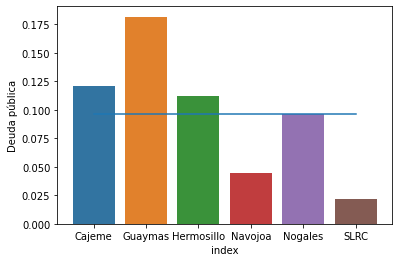

In [ ]:
sns.barplot(data= gasto_munic_pivot, x=  "index", y= "Deuda pública")
sns.lineplot(data= gasto_munic_pivot, x= "index", y= dp)

En esta gráfica podemos ver, como aspecto positivo, que el municipio de Navojoa destina poco menos de 5% al pago de la deuda pública y que además es uno de los municipios que menos destinan a esta área del gasto público. El promedio de los municipios en este aspecto es de 10%, por lo que estar por debajo de esa línea es un buen indicador.

## Inversión Pública

In [ ]:
ip = gasto_prom("Inversión pública")

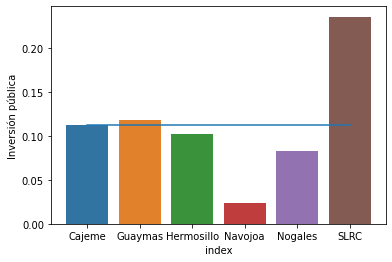

In [ ]:
sns.barplot(data= gasto_munic_pivot, x=  "index", y= "Inversión pública")
sns.lineplot(data= gasto_munic_pivot, x= "index", y= ip)

En este gráfico se observa que que el presupuesto destinado a Inversión Pública en el municipio de Navojoa es el menor de los 6 localidades comparadas, con apenas el 2.4%, mientras que el promedio es de poco más de 10%.

## Materiales y Suministros

In [ ]:
ms = gasto_prom("Materiales y suministros")
ms

0.06351677570532008

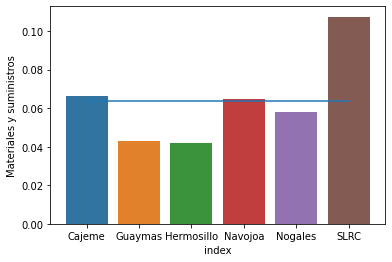

In [ ]:
sns.barplot(data= gasto_munic_pivot, x=  "index", y= "Materiales y suministros")
sns.lineplot(data= gasto_munic_pivot, x= "index", y= ms)

En esta imagen se muestra el nivel de gasto del municipio de Navojoa en cuanto al capítulo Materiales y Suministros, el cual es de poco más del 6%, muy cercano al promedio. Sin embargo, hay que anotar que Navojoa se encuentra entre los tres primeros con mayor gasto en este aspecto.

## Servicios generales

In [ ]:
sg = gasto_prom("Servicios generales")
sg

0.14038299379993302

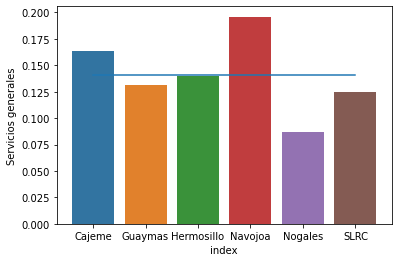

In [ ]:
sns.barplot(data= gasto_munic_pivot, x=  "index", y= "Servicios generales")
sns.lineplot(data= gasto_munic_pivot, x= "index", y= sg)

En este gráfico se puede observar que Navojoa es el municipio que más ha gastado en servicios generales, en 2018, con un monto cercano al 20%, muy por encima del promedio que es de 14%.

## Servicios personales

In [ ]:
sp = gasto_prom("Servicios personales")
sp

0.3662751260554904

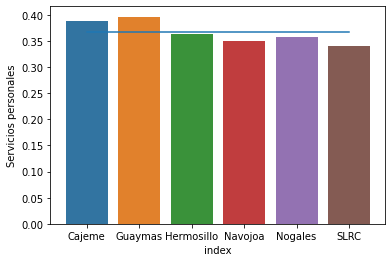

In [ ]:
sns.barplot(data= gasto_munic_pivot, x=  "index", y= "Servicios personales")
sns.lineplot(data= gasto_munic_pivot, x= "index", y= sp)

En el capítulo del gasto correspondiente a Servicios personales todos los municipios están muy cerca del promedio, el cual es de 36.6%. Navojoa está un punto pocentual por debajo de esa cifra, es decir, en 35%.

## Transferencias, asignaciones, subsidios y otras ayudas

In [ ]:
taso = gasto_prom("Transferencias, asignaciones, subsidios y otras ayudas")
taso

0.1305165292072834

In [ ]:
taso_nav = gasto_munic_pivot[gasto_munic_pivot["index"]== "Navojoa"]
taso_nav

Capitulo,index,"Bienes muebles, inmuebles e intangibles",Deuda pública,Inversión pública,Materiales y suministros,Servicios generales,Servicios personales,"Transferencias, asignaciones, subsidios y otras ayudas"
3,Navojoa,0.099539,0.044818,0.023607,0.064613,0.195965,0.350036,0.15788


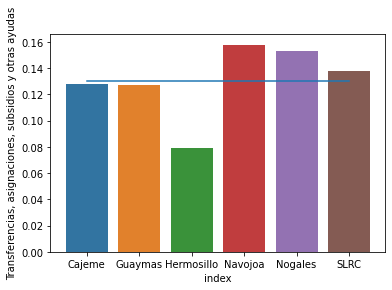

In [ ]:
sns.barplot(data= gasto_munic_pivot, x=  "index", y= "Transferencias, asignaciones, subsidios y otras ayudas")
sns.lineplot(data= gasto_munic_pivot, x= "index", y= taso)

En el rubro de "Transferencias, asignaciones, subsidios y otras ayudas" el promedio de gasto es del 13%. Navojoa ha destinado para este capítulo 15.8% de su presupuesto.

## Conclusión

En respuesta a las preguntas que se han planteado al inicio de esta investigación, se ha encontrado que el capítulo que mayor gasto ha representado para el municipio de Navojoa en 2018 es el de “Servicios personales” donde está incluido el pago de nómina. Este rubro de gasto asciende a $218,072,744 pesos, lo cual representa el 35% de las erogaciones totales.

Por otro lado, el capítulo del gasto en que se ha ejercido la menor cantidad de recursos económicos es en el de “Inversión pública”, con una cifra de $27,921,895 pesos, equivalente al 4.5% del gasto total.

La comparación con los 5 municipios más importantes del estado de Sonora, de acuerdo a su población, arroja algunos puntos dignos de ser tomados en cuenta para profundizar en ellos o para trazar estrategias que ayuden a mejorar el desempeño de las finanzas municipales y, por tanto, el valor público generado.

Uno de estos puntos es el hecho de que, de los municipios comparados, Navojoa es el que más gasta en tres de los 7 capítulos “Bienes Muebles, Inmuebles e Intangibles”, “Servicios generales” y en “Transferencias, asignaciones, subsidios y otras ayudas”, cuyos promedios son 2.6%, 14% y 13% respectivamente.

El nivel de gasto que presenta el municipio en estos capítulos es de: 10%, 19.6% y 15.8%. Esto significa que los gastos totales del municipio de Navojoa son 15.8% mayores al promedio de los demás municipios en estos capítulos. 
Tomando en cuenta que un 1% representa 6.2 millones de pesos, este 15.8% representa poco más de 90 millones de pesos que pueden optimizarse para atender otros aspectos del gasto como la “Inversión Pública” o el desarrollo de otros programas de beneficio social y económico.
